In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output

from MLP import *
#from gridSearch import *

def transform(tx):
    n_classes = [3,3,2,3,4,2]
    tx = tx-1
    mat = []
    for i,pattern in enumerate(tx):
        l = list( [to_categorical( pattern[i] , n_classes[i] ) for i in range(len(pattern) ) ]  )
        p = np.concatenate( l )
        mat = np.hstack( (mat,p) )
    return mat.reshape( np.size(tx,axis=0), 17 )

# monk 1

In [2]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-1.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-1.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] ; vx = transform(vx)

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] ; tex = transform(tex)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)
print(tex.shape, tey.shape)

(123, 17) (123, 2)
(50, 17) (50, 2)
(381, 17) (381, 2)


## mb

In [3]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


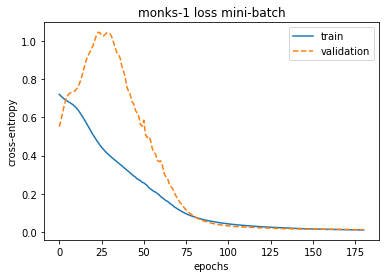

In [4]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-1 loss mini-batch")
plt.legend()
plt.savefig('monk_figures/monk1_loss_minibatch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


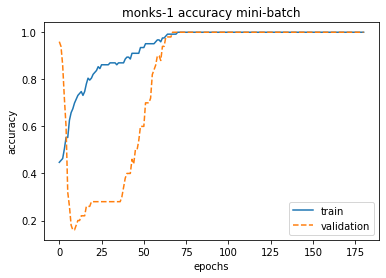

In [5]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-1 accuracy mini-batch")
plt.savefig('monk_figures/monk1_acc_minibatch.eps',format='eps')

n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)
n.save('monk_nets/monk1_minibatch.net')

 ## no mb

In [9]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


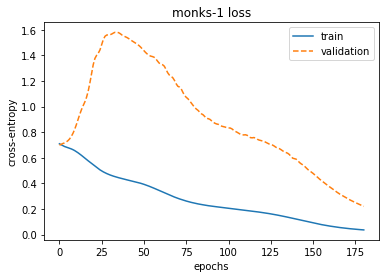

In [10]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-1 loss")
plt.legend()
plt.savefig('monk_figures/monk1_loss_batch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 0.96, 0.973753280839895)

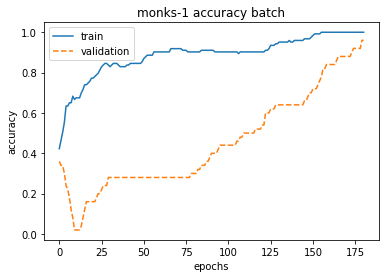

In [11]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-1 accuracy batch")
plt.savefig('monk_figures/monk1_acc_batch.eps',format='eps')
n.save('monk_nets/monk1_batch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

# monk 2

In [26]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-2.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-2.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] ; vx = transform(vx)

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] ; tex = transform(tex)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)
print(tex.shape, tey.shape)

(168, 17) (168, 2)
(50, 17) (50, 2)
(381, 17) (381, 2)


## mb

In [27]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 1e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 10,
  bs=30 )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


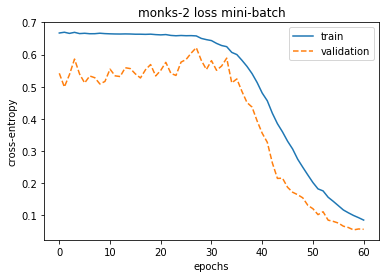

In [28]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-2 loss mini-batch")
plt.legend()
plt.savefig('monk_figures/monk2_loss_minibatch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 1.0, 1.0)

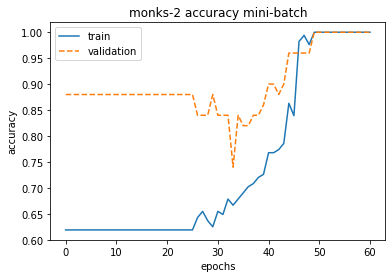

In [29]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-2 accuracy mini-batch")
plt.savefig('monk_figures/monk2_acc_minibatch.eps',format='eps')
n.save('monk_nets/monk2_minibatch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

# no mb

In [16]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


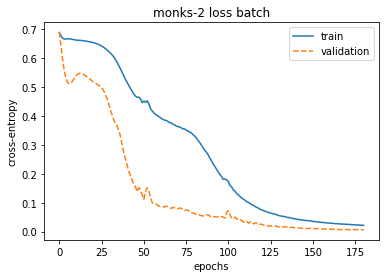

In [17]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-2 loss batch")
plt.legend()
plt.savefig('monk_figures/monk2_loss_batch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 1.0, 1.0)

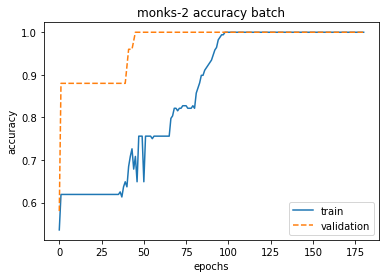

In [18]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-2 accuracy batch")
plt.savefig('monk_figures/monk2_acc_batch.eps',format='eps')
n.save('monk_nets/monk2_batch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

# monk 3

In [19]:
import pandas as pd
tr_data = pd.read_csv('monk_tests/monks-3.train',sep=' ',index_col=8)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:] ; tx = transform(tx)

te_data = pd.read_csv('monk_tests/monks-3.test',sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] ; vx = transform(vx)

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] ; tex = transform(tex)

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)
print(tex.shape, tey.shape)

(121, 17) (121, 2)
(50, 17) (50, 2)
(381, 17) (381, 2)


## mb

In [20]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 1e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=30 )

final error: 0.9586776859504132


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


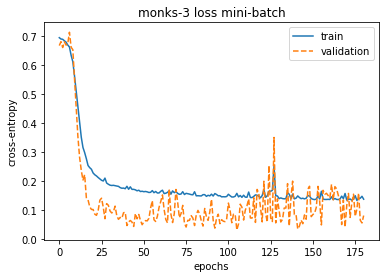

In [21]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-3 loss mini-batch")
plt.legend()
plt.savefig('monk_figures/monk3_loss_minibatch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(0.9586776859504132, 0.96, 0.9422572178477691)

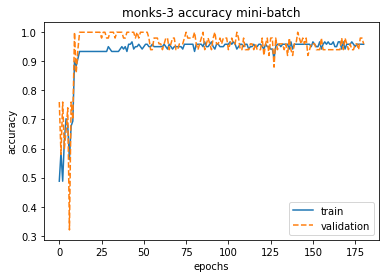

In [22]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-3 accuracy mini-batch")
plt.savefig('monk_figures/monk3_acc_minibatch.eps',format='eps')
n.save('monk_nets/monk3_minibatch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)

## no mb

In [23]:
n = MLP(  Nodes=[17,3,2], f='relu', f_out='softmax')

n.train(tx, ty, 3e-01,
  a = 7e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 30,
  bs=None )

final error: 1.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


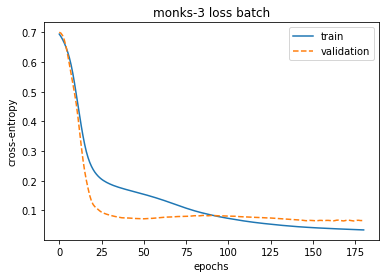

In [24]:
plt.plot(n.train_loss_history,'-',label='train')
plt.plot(n.valid_loss_history,'--',label='validation')
plt.xlabel("epochs")
plt.ylabel("cross-entropy")
plt.title("monks-3 loss batch")
plt.legend()
plt.savefig('monk_figures/monk3_loss_batch.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(1.0, 0.96, 0.9422572178477691)

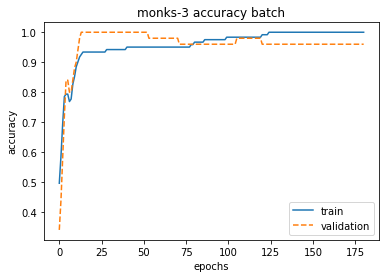

In [25]:
plt.plot(n.train_history, '-', label='train')
plt.plot(n.valid_history, '--', label='validation')
plt.legend()

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("monks-3 accuracy batch")
plt.savefig('monk_figures/monk3_acc_batch.eps',format='eps')
n.save('monk_nets/monk3_batch.net')
n.error(tx,ty), n.error(vx,vy), n.error(tex,tey)